###  1 Language: Python

***Disclaimer i have Github-copilot enabled in my VS code***

In [137]:
import math 
import time
import numpy as np
import matplotlib.pyplot as plt

from scipy.integrate import odeint
from scipy.integrate import solve_ivp

import scipy.optimize as opt
from scipy.optimize import fsolve
from scipy.optimize import root
from scipy.optimize import minimize
from scipy.optimize import Bounds
from scipy.optimize import LinearConstraint

In [138]:
#This is just my general Euler forward function

def forward_euler(f, y0, t_start, t_stop, h):
    
    t_values = [t_start]
    y_values = [y0]

    while t_values[-1] < t_stop:
        t_next = t_values[-1] + h
        y_next = y_values[-1] + h * f(t_values[-1], y_values[-1])

        t_values.append(t_next)
        y_values.append(y_next)

    return t_values, y_values

In [139]:
#This is just my general Euler backward function

def backward_euler(f, y0, t_start, t_stop, h):
    t_values = [t_start]
    y_values = [y0]

    while t_values[-1] < t_stop:
        t_next = t_values[-1] + h
        y_next = y_values[-1] + h * f(t_next, y_values[-1])

        t_values.append(t_next)
        y_values.append(y_next)

    return t_values, y_values

In [140]:
# This is just my general RK4 function

def rk_4(f, y0, t_start, t_stop, h):
    
    # f is the function to integrate
    # y0 is the initial value
    # t_start is the start time
    # t_stop is the stop time
    # h is the step size
    
    t_values = [t_start]
    v_values = [y0]
    
    while t_values[-1] < t_stop:
        k1 = f(t_values[-1], v_values[-1])
        k2 = f(t_values[-1] + h/2, v_values[-1] + h/2 * k1)
        k3 = f(t_values[-1] + h/2, v_values[-1] + h/2 * k2)
        k4 = f(t_values[-1] + h, v_values[-1] + h * k3)
    
        t_next = t_values[-1] + h
        y_next = v_values[-1] + h/6 * (k1 + 2*k2 + 2*k3 + k4)

        t_values.append(t_next)
        v_values.append(y_next)

    return t_values, v_values

### 2. The number $N$

For me the number $N$ is $72$.

In [141]:
N=72

### 3. Existence but not uniqueness

Consider the BVP (Boundary Value Problem):
$$
y^{\prime} = \sqrt{|y|}, \quad y(0)=0
$$


#### Analytical Solution


For the $y<0$:
$$
\begin{gathered}
\frac{d y}{d x}=\sqrt{-y} \\
(-y)^{-\frac{1}{2}} \frac{d y}{d x}=1 \\
-2 \sqrt{-y}=x+c \\
-4 y=(x+c)^2 \\
y=-\frac{1}{4}(x+c)^2
\end{gathered}
$$
$$
y(x)=-\frac{x^2}{4}
$$

for $y>0$
$$
\begin{gathered}
\frac{d y}{d x}=\sqrt{y} \\
(y)^{-\frac{1}{2}} y^{\prime}=1 \\
2 y^{\frac{1}{2}}=x+c \\
y^{\frac{1}{2}}=\frac{1}{2}(x+c) \\
y=\frac{1}{4}(x+c)^2
\end{gathered}
$$
$$
y(x)=\frac{x^2}{4}
$$

***Coments***
1. **Existence of Multiple Solutions**: 
- The differential equation $y' = \sqrt{|y|}$ with the initial condition $y(0) = 0$ has multiple solutions. 
- This is evident from the analytical solutions we derived for both $y < 0$ and $y > 0$. 
- This behavior is characteristic of non-linear differential equations, where the existence of a solution is guaranteed, but uniqueness is not.

2. **Symmetry**: 
- The solutions $y(x) = -\frac{x^2}{4}$ for $y < 0$ and $y(x) = \frac{x^2}{4}$ for $y > 0$ are symmetric about the x-axis. 
- This is expected given the absolute value in the differential equation, which makes the equation symmetric about the y-axis.

3. **Boundary Behavior**: 
- The solution approaches $y = 0$ as $x$ approaches 0 from both the positive and negative sides. 
- This is consistent with the given boundary condition $y(0) = 0$.

#### Numerical Solution

*I like RK4 it seemed like the best one due to its accuracy and stability.*

In [142]:
# This is a slightly modified version of the RK4 function that I used for the problem3

def rk_4_for_problem3(f, y0, t_start, t_stop, h):
    
    # f is the function to integrate
    # y0 is the initial value
    # t_start is the start time
    # t_stop is the stop time
    # h is the step size
    
    t_value = [t_start]
    y_value = [y0]
    sample_t = []
    sample_y = []
    
    # sample_t is the list of time values
    # sample_y is the list of y values
    # the sample_t and sample_y are the values that satisfy the condition y(t) = 0
    
    while t_value[-1] < t_stop:
        k1 = f(t_value[-1], y_value[-1])
        k2 = f(t_value[-1] + h/2, y_value[-1] + h/2 * k1)
        k3 = f(t_value[-1] + h/2, y_value[-1] + h/2 * k2)
        k4 = f(t_value[-1] + h, y_value[-1] + h * k3)
        
        t_next = t_value[-1] + h
        y_next = y_value[-1] + h/6 * (k1 + 2*k2 + 2*k3 + k4)
        
        t_value.append(t_next)
        y_value.append(y_next)
        
        # I added this to check if y deviates from 0
        if y_next > 1e-4:
            break
        
        if abs(y_next) < 1e-4:
            sample_t.append(t_next)
            sample_y.append(y_next)
    
    return sample_t, sample_y

In [143]:
# Define the function
def f(t, y):
    return np.sqrt(abs(y))

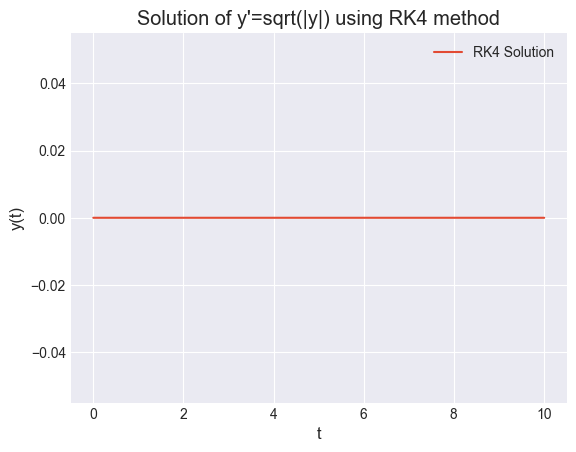

In [144]:
t_start = 1
y0 = -10
t_stop = 10
N = 1000
h = (t_stop - t_start) / N

t, y = rk_4(f, 0, 0, t_stop, h)

plt.plot(t, y, label='RK4 Solution')
plt.title("Solution of y'=sqrt(|y|) using RK4 method")
plt.xlabel('t')
plt.ylabel('y(t)')
plt.legend()
plt.grid(True)
plt.show()

In [145]:
t_start = -1
y_plus_epsilon = -1 + 1e-10
t_stop = 10
# Here if I use my N=72 The graph look ugly, so I used N=100000
# If I use N=72 the graph looks like 2 streight lines.
N=100000
h = (t_stop - t_start) / N

t, y = rk_4_for_problem3(f, y_plus_epsilon, t_start, t_stop, h)
print(f"Stuck at y = 0 between {round(t[1], 3)} and {round(t[-1], 5)}")

Stuck at y = 0 between 0.98 and 1.01993


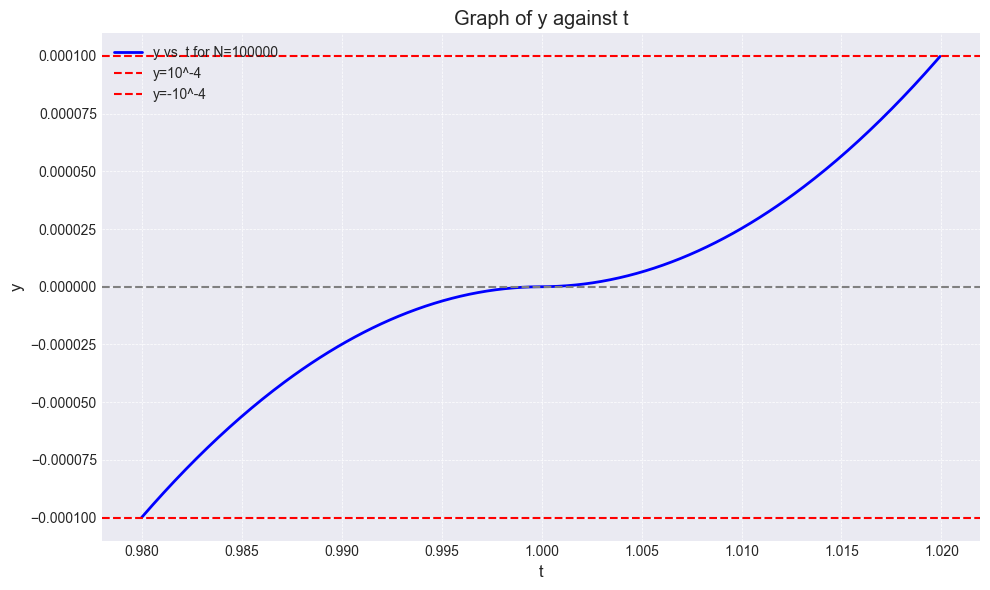

In [146]:
#Plot - I wanted to make it nice...
plt.figure(figsize=(10, 6))
plt.title('Graph of y against t')
plt.plot(t, y, color='blue', linestyle='-', linewidth=2, label='y vs. t for N=100000')

# Add horizontal lines for zero & tolerance
plt.axhline(0, color='gray', linestyle='--')
plt.axhline(1e-4, color='red', linestyle='--', label="y=10^-4")
plt.axhline(-1e-4, color='red', linestyle='--', label="y=-10^-4")

plt.xlabel('t')
plt.ylabel('y')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.legend()
plt.tight_layout()
plt.show()

***Numerical Comments***

1. **RK4 Method**: 
- If we have non-unique solutions, the numerical method might converge to one of the possible solutions.
- Where the method converges is based on our initial condition and step size.

2. **Straight Line in First Plot**: 
- The plot with a straight line shows one numerical solution that remains at $y = 0$. 
- This is one of the solutions to the equation, but it's not the only one!

3. **Sensitivity to Initial Conditions**: 
- Small perturbation `y_plus_epsilon = -1 + 1e-10` to the initial condition. 
- This results in the solution deviating from $y = 0$. 
- This shows that the equation is extremly sensitive to initial conditions, especially near the boundary $y = 0$

#### Extra
- Let's try to Illustrate this better:

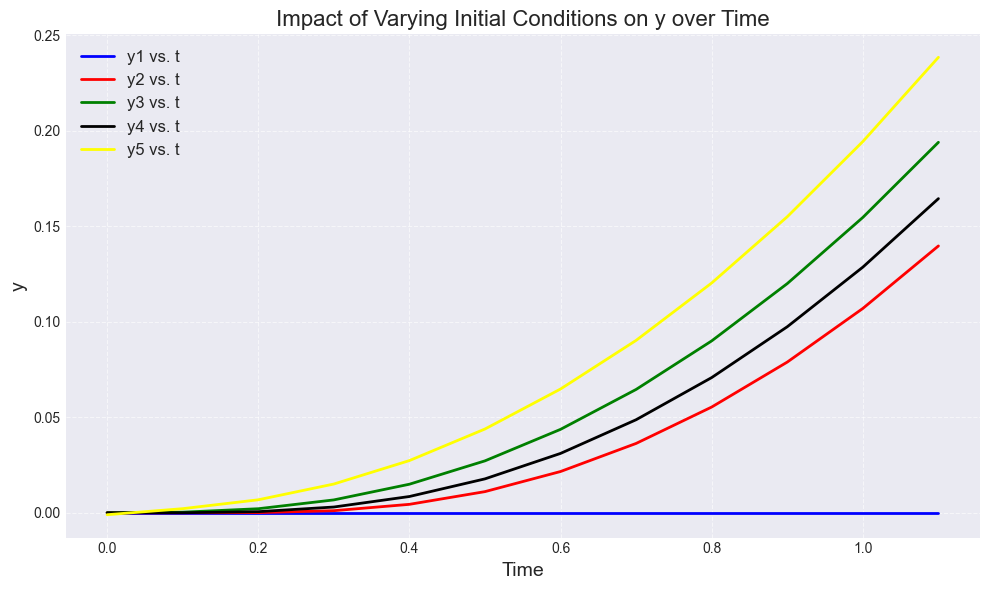

In [147]:
# Assume that I have several points to test.

# I define my initial conditions
y1_initial=0
y2_initial=0+1e-10
y3_initial=0+1e-5
y4_initial=0-1e-7
y5_initial=0-1e-3

# I have my function
def f(t, y):
    return np.sqrt(abs(y))

#This is just my general Euler forward function
def forward_euler_problem3(f, y_initial, t_start, t_stop, h):
    
    t_values = [t_start]
    y_values = [y_initial]

    while t_values[-1] < t_stop:
        t_next = t_values[-1] + h
        y_next = y_values[-1] + h * f(t_values[-1], y_values[-1])

        t_values.append(t_next)
        y_values.append(y_next)

    return t_values, y_values

# Get the values for y1, y2, y3, y4, y5
y1_values = forward_euler_problem3(f, y1_initial, 0, 1, 0.1)
y2_values = forward_euler_problem3(f, y2_initial, 0, 1, 0.1)
y3_values = forward_euler_problem3(f, y3_initial, 0, 1, 0.1)
y_4values = forward_euler_problem3(f, y4_initial, 0, 1, 0.1)
y_5values = forward_euler_problem3(f, y5_initial, 0, 1, 0.1)

# I plot the graphs
# I plot the graphs
plt.figure(figsize=(10, 6))
plt.title('Impact of Varying Initial Conditions on y over Time', fontsize=16)
plt.plot(y1_values[0], y1_values[1], color='blue', linestyle='-', linewidth=2, label='y1 vs. t')
plt.plot(y2_values[0], y2_values[1], color='red', linestyle='-', linewidth=2, label='y2 vs. t')
plt.plot(y3_values[0], y3_values[1], color='green', linestyle='-', linewidth=2, label='y3 vs. t')
plt.plot(y_4values[0], y_4values[1], color='black', linestyle='-', linewidth=2, label='y4 vs. t')
plt.plot(y_5values[0], y_5values[1], color='yellow', linestyle='-', linewidth=2, label='y5 vs. t')
plt.xlabel('Time', fontsize=14)
plt.ylabel('y', fontsize=14)
plt.legend(loc='best', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

- In summary, we demonstrate that for $y^{\prime} = \sqrt{|y|}$, there are infinitely many solutions in the neighborhood of $0$.
- This is due to the nature of the differential equation and sensitivity to initial conditions.
- This is related to Picards Theorem!

### 4. PANG!

Betrakta BVP
$$
y^{\prime}=y^2, \quad y(0)=N / 100
$$

#### Analytical Solution


$$
y' = y^2
$$

$$
\frac{dy}{y^2} = dt
$$

$$
\int \frac{dy}{y^2} = \int dt
$$

$$
-\frac{1}{y} = t + C
$$

$$
-\frac{1}{\frac{N}{100}} = C
$$

$$
C = -\frac{100}{N}
$$

$$
-\frac{1}{y} = t - \frac{100}{N}
$$

$$
y(t) = \frac{N}{100 - Nt}
$$

$$
y(t) = \frac{N}{100 - Nt}
$$

The solution "blows up" when the denominator is zero:
$$
100 - Nt = 0
$$
$$
t = \frac{100}{N}
$$

#### Numerical Solution

In [148]:
# This is a slightly modified version of the RK4 function that I used for the problem4

def rk_4_for_problem4(f, y0, t_start, t_stop, h):
    
    # f is the function to integrate
    # y0 is the initial value
    # t_start is the start time
    # t_stop is the stop time
    # h is the step size 
    
    t_value = [t_start]
    y_value = [y0]
    
    # sample_t is the list of time values
    # sample_y is the list of y values
    # the sample_t and sample_y are the values that satisfy the condition y(t) = 0
    
    while t_value[-1] < t_stop:
        k1 = f(t_value[-1], y_value[-1])
        k2 = f(t_value[-1] + h/2, y_value[-1] + h/2 * k1)
        k3 = f(t_value[-1] + h/2, y_value[-1] + h/2 * k2)
        k4 = f(t_value[-1] + h, y_value[-1] + h * k3)
        
        t_next = t_value[-1] + h
        y_next = y_value[-1] + h/6 * (k1 + 2*k2 + 2*k3 + k4)
        
        t_value.append(t_next)
        y_value.append(y_next)
        
        # I define this arbitrary value 1e10 to tell me that the function is diverging
        # This arbitrary restrtion should give me my time to singularity, given my stepsize is also nice and small.
        if y_next > 1e10:
            break
    
    return t_value, y_value

In [149]:
# Define the function
def f(t,y):
    return y**2

***Simple numerical simulation of the differential equation $y^{\prime}=y^2$***

In [150]:
#Initial conditions
N=72
y0 = N / 100
t_start = 0
t_stop = 5
h = (t_stop - t_start) / 1000

# Return evenly spaced numbers over a specified interval.
t_values = np.arange(0, t_stop, h)
y_values = []

#Kick off the loop
y = y0

for t in t_values:
    y_values.append(y)
    y += h * y**2
    # I define this arbitrary value 1e50 to stop the loop as blowing up
    if abs(y) > 1e50:
        print("Solution is growing too rapidly. Stopping integration.")
        break

t_values = t_values[:len(y_values)]

Solution is growing too rapidly. Stopping integration.


***Blowing up***

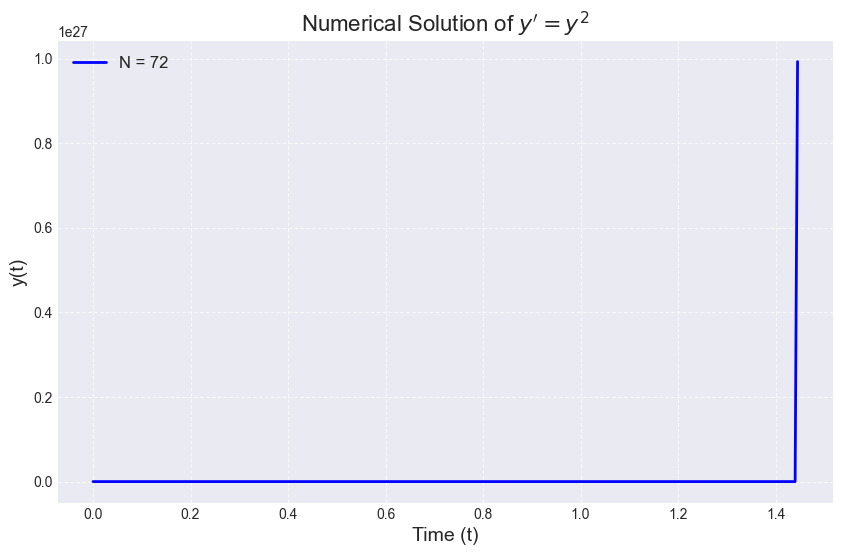

Estimated time to singularity: 1.3889999999998635


In [151]:
#Initial conditions
N=72
y0 = N / 100
t_start = 0
t_stop = 10
h = (t_stop - t_start) / 100000

t,y=rk_4_for_problem4(f, y0, t_start, t_stop, h)

# Plot
plt.figure(figsize=(10, 6))
plt.plot(t_values[:len(y_values)], y_values, label=f'N = {N}', color='b', linewidth=2)
plt.xlabel('Time (t)', fontsize=14)
plt.ylabel('y(t)', fontsize=14)
plt.title("Numerical Solution of $y' = y^2$", fontsize=16)
plt.legend(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

print("Estimated time to singularity:", t[-1])

#### Numerical example

- Can you find numerical examples where $y(0)=\epsilon<0$, but $y(t)>0$ for some $t>0$? 

    - Tips: You may need to modify the equation slightly and use $y' - Cy^2 =0$ for a "large" $C>0$". 




OverflowError: (34, 'Result too large')

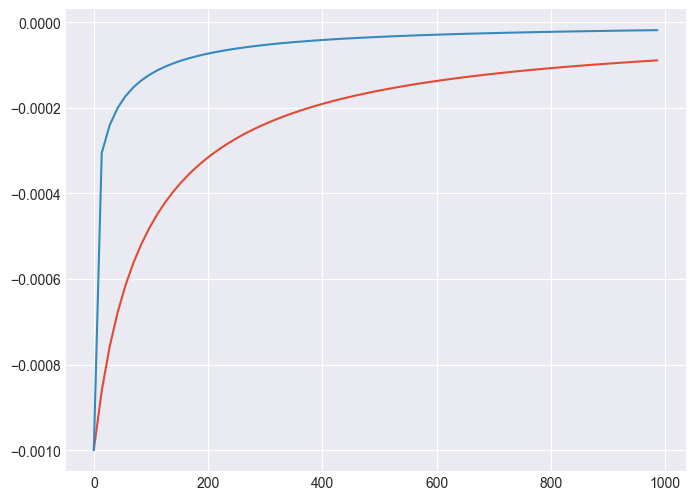

In [154]:
#I think this is a cute solution, although I'm not sure if we are allowed to do it like this...
# Code Copied and modified from Stack Overflow

def solve_diff_eq(C, epsilon, t_max, h):

    # Define my differential equation
    def f(t, y):
        return C * y**2

    # Initialize arrays for t and y values
    t_values = np.arange(0, t_max, h)
    y_values = []

    y = epsilon

    for t in t_values:
        y_values.append(y)
        y += h * f(t, y)

    return t_values, y_values

# Initial conditions
t_start = 0
t_stop = 1000
h = (t_stop-t_start) / N

# Define the epsilon value and C values
epsilon = -1e-3
C_values = [10, 50, 100, 500, 750, 1000]  # Large positive C values we want to try

# Plot the solutions
plt.figure(figsize=(8, 6))

# Solve and plot for each C value
for C in C_values:
    t_values, y_values = solve_diff_eq(C, epsilon, t_stop, h)
    plt.plot(t_values, y_values, label=f'C = {C}')

plt.axhline(0, color='gray', linestyle='--')
plt.xlabel('Time (t)')
plt.ylabel('y(t)')
plt.title("Numerical Solution of y' = Cy^2")
plt.legend()
plt.grid(True)
plt.show()

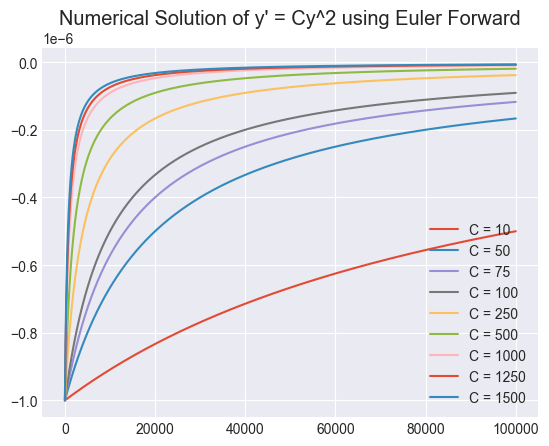

In [155]:
def differential_equation(x, y, C):
    return C * y ** 2

def  euler_forward_problem4_C(f, C):

    step_size = 1
    time_start = 0
    time_end = 1e5
    initial_value = -1e-6
    time_points = [time_start]
    solution_values = [initial_value]

    while time_points[-1] < time_end:
        next_time = time_points[-1] + step_size
        next_value = solution_values[-1] + step_size * f(time_points[-1], solution_values[-1], C)
        time_points.append(next_time)
        solution_values.append(next_value)

    return time_points, solution_values

def plot_solution():
    import matplotlib.pyplot as plt

    C_values = [10, 50, 75, 100, 250, 500, 1000, 1250, 1500]
    for C in C_values:
        x_vals, y_vals = euler_forward_problem4_C(differential_equation, C)
        plt.plot(x_vals, y_vals, label=f"C = {C}")

    plt.grid(True)
    plt.title("Numerical Solution of y' = Cy^2 using Euler Forward")
    plt.legend()
    plt.show()

# Call the function to run the program
plot_solution()

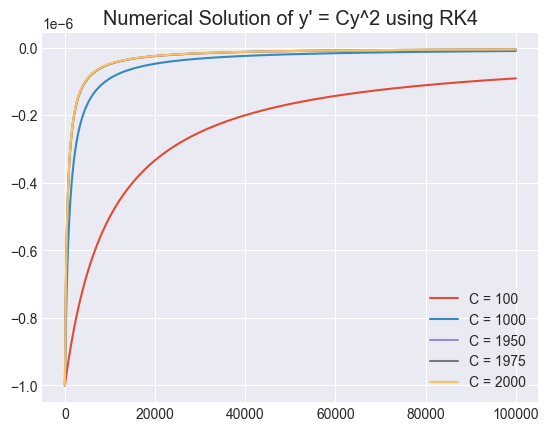

In [156]:
def differential_equation(x, y, C):
    return C * y ** 2

def rk4(f, C):
    step_size = 1
    time_start = 0
    time_end = 1e5
    initial_value = -1e-6
    time_points = [time_start]
    solution_values = [initial_value]

    while time_points[-1] < time_end:
        t = time_points[-1]
        y = solution_values[-1]
        
        k1 = step_size * f(t, y, C)
        k2 = step_size * f(t + 0.5 * step_size, y + 0.5 * k1, C)
        k3 = step_size * f(t + 0.5 * step_size, y + 0.5 * k2, C)
        k4 = step_size * f(t + step_size, y + k3, C)

        next_value = y + (k1 + 2*k2 + 2*k3 + k4) / 6
        next_time = t + step_size

        time_points.append(next_time)
        solution_values.append(next_value)

    return time_points, solution_values

def plot_solution():

    C_values = [100, 1000, 1950, 1975, 2000]
    for C in C_values:
        x_vals, y_vals = rk4(differential_equation, C)
        plt.plot(x_vals, y_vals, label=f"C = {C}")

    plt.grid(True)
    plt.title("Numerical Solution of y' = Cy^2 using RK4")
    plt.legend()
    plt.show()

# Call the function to run the program
plot_solution()

###  5. Not a PANG

Consider the BVP (Boundary Value Problem):
$$
y^{\prime}=y, \quad y(0)=N
$$

- Solve the problem numerically and find $y\left(2^k\right)$ with two correct decimal places for $k=1,2,3, \ldots$ 
- Torture your computer until it gives up!

#### Analytical Solution

$$y' = y$$
$$
\frac{\frac{d y(t)}{d t}}{y(t)}=1
$$
$$
\int \frac{\frac{d y(t)}{d t}}{y(t)} d t=\int 1 d t
$$
$$
\log (y(t))=t+c_1
$$
$$
y(t)=e^{t+c_1}
$$
$$
y(t)=c_1 e^t
$$
$$
c_1=N
$$
$$
y(t)=N e^t
$$


#### Numerical Solution

In [ ]:
# The function then returns whether the goal was exactly met 
def rk_4_for_problem5(f, y0, t_start, goal_value, h):
    
    # f is the function to integrate
    # y0 is the initial value
    # t_start is the start time
    # t_stop is the stop time
    # h is the step size 
    
    t_value = [t_start]
    y_value = [y0]
    
    # Here I define a condition that will tell me if the goal is met
    condition = True
    
    #We keep looping until the condition is false
    while condition:
        
        k1 = f(t_value[-1], y_value[-1])
        k2 = f(t_value[-1] + h/2, y_value[-1] + h/2 * k1)
        k3 = f(t_value[-1] + h/2, y_value[-1] + h/2 * k2)
        k4 = f(t_value[-1] + h, y_value[-1] + h * k3)
        
        t_next = t_value[-1] + h
        y_next = y_value[-1] + h/6 * (k1 + 2*k2 + 2*k3 + k4)
        
        t_value.append(t_next)
        y_value.append(y_next)

        # Check if the goal is met exactly
        if round(y_value[-1], 2) == round(goal_value, 2):
            # I return the last value of y where we met the goal.
            return condition, y_value[-1]
        
        #Check if we overshot the goal
        if round(y_value[-1], 2) >= round(goal_value, 2):
            condition = False
            # I return the last value of y before we overshot the goal
            return condition, y_value[-1]

In [ ]:
def euler_forward_for_problem5(initial_time, initial_value, power, step_size):
    
    stopping_time = 2**power
    current_time = initial_time
    current_value = initial_value

    while current_time < stopping_time:
        current_time += step_size
        current_value += step_size * current_value
        
    return current_value



In [ ]:
def f(t,y): 
    return y

In [ ]:
# This is the analytical solution
def y(t):
    return 72* np.exp(t)

In [ ]:
# Initial conditions
N = 100
y0 = 72
t_start = 0

#For my visualisation purposes
rk4_errors = []
euler_errors = []
ks = list(range(5))

for k in range(5):
    # Define my goal value
    goal_value = y(2**k)
    # I want to be able to adjust the step size so that I can get closer to the goal value
    h = (2**k - t_start) / N

    condition, y_value_rk4 = rk_4_for_problem5(f, y0, t_start, goal_value, h)
    y_value_euler = euler_forward_for_problem5(t_start, y0, k, h)
    
    # Keep trying with a smaller step until the condition becomes True
    while not condition:
        N = N * 1e3
        h = (2**k - t_start) / N
        condition, y_value_rk4 = rk_4_for_problem5(f, y0, t_start, goal_value, h)
        y_value_euler = euler_forward_for_problem5(t_start, y0, k, h)
        

    # Print the results
    print(f"Goal value is {goal_value} at k={k} for stepsize={h} and RK4 solution is {y_value_rk4}, Euler's method solution is {y_value_euler}")
    
    rk4_error = abs(goal_value - y_value_rk4)
    euler_error = abs(goal_value - y_value_euler)

    rk4_errors.append(rk4_error)
    euler_errors.append(euler_error)

Goal value is 195.71629164905124 at k=0 for stepsize=0.01 and RK4 solution is 195.716291632877, Euler's method solution is 194.74659571834985
Goal value is 532.0120391230068 at k=1 for stepsize=0.02 and RK4 solution is 532.0120377277519, Euler's method solution is 521.6145205141681
Goal value is 3931.066802386385 at k=2 for stepsize=0.04 and RK4 solution is 3931.066477927597, Euler's method solution is 3636.356269267395


Goal value is 214628.97506700445 at k=3 for stepsize=8e-05 and RK4 solution is 214628.9750670087, Euler's method solution is 214577.47326909637
Goal value is 639799957.4765668 at k=4 for stepsize=0.00016 and RK4 solution is 639799957.4765636, Euler's method solution is 639083861.7233425


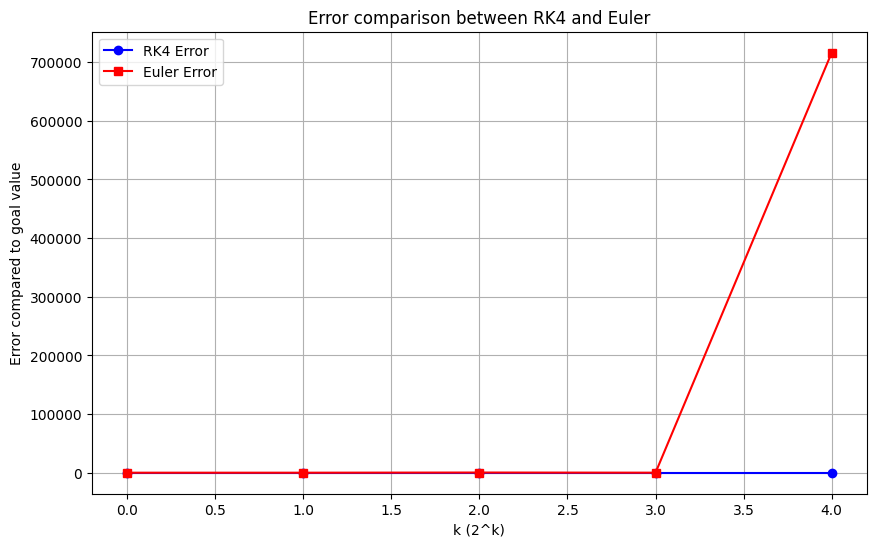

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(ks, rk4_errors, 'o-', label='RK4 Error', color='blue')
plt.plot(ks, euler_errors, 's-', label='Euler Error', color='red')
plt.xlabel('k (2^k)')
plt.ylabel('Error compared to goal value')
plt.title('Error comparison between RK4 and Euler')
plt.legend()
plt.grid(True)
plt.show()

***Im not satisfied with this!***

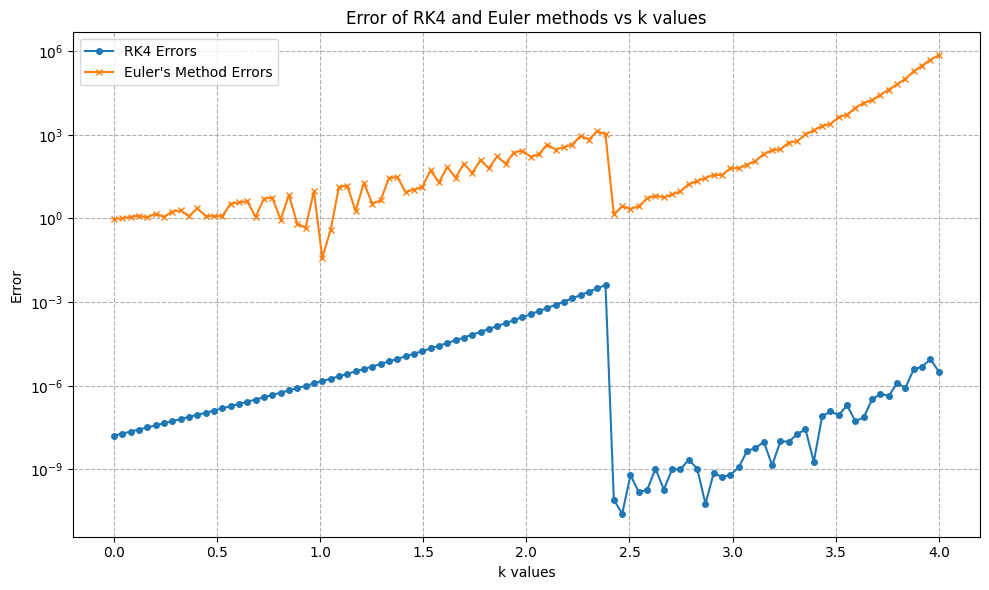

In [ ]:
N = 100
y0 = 72
t_start = 0

rk4_errors = []
euler_errors = []

# Using linspace to generate values between 0 and 4, inclusive, with a desired number of points
num_points = 100
k_values = np.linspace(0, 4, num_points)

for k in k_values:
    # Define my goal value
    goal_value = y(2**k)
    # ... (rest of your loop logic)
    # I want to be able to adjust the step size so that I can get closer to the goal value
    h = (2**k - t_start) / N

    condition, y_value_rk4 = rk_4_for_problem5(f, y0, t_start, goal_value, h)
    y_value_euler = euler_forward_for_problem5(t_start, y0, k, h)
    
    # Keep trying with a smaller step until the condition becomes True
    while not condition:
        N = N * 1e3
        h = (2**k - t_start) / N
        condition, y_value_rk4 = rk_4_for_problem5(f, y0, t_start, goal_value, h)
        y_value_euler = euler_forward_for_problem5(t_start, y0, k, h)
    
    # Compute the errors for this k and append to the lists
    rk4_error = abs(goal_value - y_value_rk4)
    euler_error = abs(goal_value - y_value_euler)

    rk4_errors.append(rk4_error)
    euler_errors.append(euler_error)

plt.figure(figsize=(10,6))
plt.plot(k_values, rk4_errors, '-o', label='RK4 Errors', markersize=4)
plt.plot(k_values, euler_errors, '-x', label="Euler's Method Errors", markersize=4)
plt.xlabel('k values')
plt.ylabel('Error')
plt.title('Error of RK4 and Euler methods vs k values')
plt.yscale('log')  # Use a logarithmic scale on the y-axis to better visualize the errors
plt.legend()
plt.grid(True, which="both", ls="--")
plt.tight_layout()
plt.show()

###  6. What is $\pi$?

Read the beginning of Chapter 4.24. Consider the BVP (Boundary Value Problem):
$$
y^{\prime \prime}+y=0, \quad y(0)=1, \quad y^{\prime}(0)=0
$$

#### Analytical Solution

$$ y'' + y = 0 $$
$$ y(0) = 1 $$
$$ y'(0) = 0 $$

---

$$ y(t) = e^{mt} $$
$$ m^2 e^{mt} + e^{mt} = 0 $$

Factoring out $e^{mt}$ I should be able to do this since it's never zero...
$$ m^2 + 1 = 0 $$

My Characteristic equation is:
$$ m^2 = -1 $$

From this I  get:
$$ m = i, \quad m = -i $$

Using Euler:
$$ e^{it} = \cos(t) + i \sin(t) $$
$$ e^{-it} = \cos(t) - i \sin(t) $$


$$ y(t) = A (\cos(t) + i \sin(t)) + B (\cos(t) - i \sin(t)) $$
$$ y(t) = (A + B) \cos(t) + i (A - B) \sin(t) $$


$$ A - B = 0 $$
$$ A = B $$


$$ y(t) = 2A \cos(t) $$


$$ y(0) = 2A = 1 $$
$$ A = \frac{1}{2} $$

$$ y(t) = \cos(t) $$


---

#### Code:


- Warm-up: How many correct digits can you get before your computer melts? 
    - Try Euler and better methods.

##### Naive implementation of the RK4 method:

In [ ]:
# Define the differential equation and its derivative
f = lambda t, y, yp: -y

# Euler's method
def euler_method(h, t_max):
    t = 0
    y = 1
    yp = 0
    while y > 0:
        yp_new = yp + h * f(t, y, yp)
        y += h * yp
        yp = yp_new
        t += h
    return t

# 4th order Runge-Kutta method
def runge_kutta(h, t_max):
    t = 0
    y = 1
    yp = 0
    while y > 0:
        k1 = h * yp
        l1 = h * f(t, y, yp)
        k2 = h * (yp + 0.5 * l1)
        l2 = h * f(t + 0.5 * h, y + 0.5 * k1, yp + 0.5 * l1)
        k3 = h * (yp + 0.5 * l2)
        l3 = h * f(t + 0.5 * h, y + 0.5 * k2, yp + 0.5 * l2)
        k4 = h * (yp + l3)
        l4 = h * f(t + h, y + k3, yp + l3)
        y += (k1 + 2 * k2 + 2 * k3 + k4) / 6
        yp += (l1 + 2 * l2 + 2 * l3 + l4) / 6
        t += h
    return t

# Step size
h = 0.000001
t_max=10000

# Estimate pi using both methods
pi_euler = 2 * euler_method(h, t_max)
pi_rk = 2 * runge_kutta(h, t_max)

print(f'Pi estimated using Euler method: {pi_euler}')
print(f'Pi estimated using Runge-Kutta method: {pi_rk}')

Pi estimated using Euler method: 3.141593999921921
Pi estimated using Runge-Kutta method: 3.141593999921921


##### Try Harder:

- After warming up: find 20 correct decimal places. 
    - Hint: you can ask for a hint => Decimal arithmetic + Vectors

$$
y^{\prime \prime}+y=0, \quad y(0)=1, \quad y^{\prime}(0)=0
$$   

In [ ]:
from decimal import Decimal, getcontext

# Set precision for Decimal calculations
getcontext().prec = 30

def get_negative(value):
    return -Decimal(value)

def compute_pi_approximation(step_size):
    step_size = Decimal(f"{step_size}")
    
    # Initial values    
    current_y, derivative_y, current_x = Decimal(1), Decimal(0), Decimal(0)
    
    while True:
        
        # Compute the k values for y and n values for derivative_y
        k1 = step_size * derivative_y
        n1 = step_size * get_negative(current_y)
        k2 = step_size * (derivative_y + Decimal(0.5) * n1)
        n2 = step_size * get_negative(current_y + Decimal(0.5) * k1)
        k3 = step_size * (derivative_y + Decimal(0.5) * n2)
        n3 = step_size * get_negative(current_y + Decimal(0.5) * k2)
        k4 = step_size * (derivative_y + n3)
        n4 = step_size * get_negative(current_y + k3)  

        # Update current_y, derivative_y, and current_x values
        current_y += (Decimal(1)/Decimal(6)) * (k1 + 2*k2 + 2*k3 + k4)
        derivative_y += (Decimal(1)/Decimal(6)) * (n1 + 2*n2 + 2*n3 + n4)
        current_x += step_size
        
        # Exit condition: when current_y crosses zero
        if current_y <= Decimal("0"):
            previous_x = current_x - step_size
            previous_y = current_y - (Decimal(1)/Decimal(6))*(k1 + 2*k2 + 2*k3 + k4)
            break
            
    return previous_x, current_x, previous_y, current_y

def correct_decimal_places(true_value, estimated_value):
    for i, (actual, estimated) in enumerate(zip(str(true_value)[2:], str(estimated_value)[2:])):
        if actual != estimated:
            return i
    return i + 1

def get_pi_approximation(step_size):
    prev_x, curr_x, prev_y, curr_y = compute_pi_approximation(step_size)
    pi_estimate = prev_x - prev_y * (curr_x - prev_x) / (curr_y - prev_y)
    pi_estimate *= 2
    
    actual_pi = Decimal("3.141592653589793238462643")
    decimals_correct = correct_decimal_places(actual_pi, pi_estimate)
    
    print(f"Estimated value of pi:   {pi_estimate}")
    print(f"Actual value of pi:      {actual_pi}")
    print(f"Correct decimal places:  {decimals_correct}")

get_pi_approximation(1e-7)


Estimated value of pi:   3.14159265358979323846267372696
Actual value of pi:      3.141592653589793238462643
Correct decimal places:  22


In [ ]:
import numpy as np
from decimal import Decimal, getcontext

# Set precision for Decimal calculations
getcontext().prec = 28

def dydx_function(x, y):
    return np.array([y[1], -y[0]])

def runge_kutta_method(dydx, initial_y, initial_x, step_size):
    step_size = Decimal(step_size)
    current_y = initial_y
    current_x = initial_x

    while True:
        k1 = dydx(current_x, current_y)
        k2 = dydx(current_x + step_size / 2, current_y + step_size / 2 * k1)
        k3 = dydx(current_x + step_size / 2, current_y + step_size / 2 * k2)
        k4 = dydx(current_x + step_size, current_y + step_size * k3)
        
        next_y = current_y + step_size / 6 * (k1 + 2 * k2 + 2 * k3 + k4)
        next_x = current_x + step_size

        if next_y[0] < 0:
            return [current_x, next_x], [current_y, next_y]

        current_y = next_y
        current_x = next_x

def correct_decimal_places(true_value, estimate):
    true_str = str(true_value)
    estimate_str = str(estimate)

    correct_decimals = 0
    for t, e in zip(true_str.split('.')[1], estimate_str.split('.')[1]):
        if t == e:
            correct_decimals += 1
        else:
            break
    return correct_decimals

initial_conditions = np.array([Decimal(1), Decimal(0)]).T
start_time = 0
step_size = 1e-8

time_values, y_values = runge_kutta_method(dydx_function, initial_conditions, start_time, step_size)

slope = (y_values[1] - y_values[0]) / (time_values[1] - time_values[0])
previous_y = y_values[-2]

half_pi_estimate = time_values[-2] - previous_y / slope
pi_estimate = 2 * half_pi_estimate

actual_pi = Decimal("3.141592653589793238462643")
decimals_correct = correct_decimal_places(actual_pi, pi_estimate)

print(f"Estimated value of pi:   {pi_estimate}")
print(f"Actual value of pi:      {actual_pi}")
print(f"Correct decimal places:  {decimals_correct}")

Estimated value of pi:   [Decimal('3.141592653589793238487897548')
 Decimal('11547007.02186466924838885642')]
Actual value of pi:      3.141592653589793238462643
Correct decimal places:  19


###  7. Newton!
Read Chapter 3.21. Place the sun at the origin and assume the sun does not move. 
Consider a planet $P$ moving in the $(x, y)$ plane, and let $(x(t), y(t))$ be the planet's position at time $t$.

- Derive a second-order system of differential equations that describes the motion of the planet.
    - Without switching to polar coordinates! 
    - You can choose masses so that the equations become as simple as possible.

#### Analytical Solution


**1. Gravitational Force**:
The gravitational force between the Sun and the planet is described by Newton's law of gravitation:
$$ F = \frac{G \cdot M_s \cdot M_p}{r^2} $$

**2. Components of Gravitational Force**:
The components of the gravitational force in the x and y directions are:
$$ F_x = F \cdot \frac{x}{r} $$
$$ F_y = F \cdot \frac{y}{r} $$
Substituting the expression for $ F $:
$$ F_x = \frac{G \cdot M_s \cdot M_p \cdot x}{r^3} $$
$$ F_y = \frac{G \cdot M_s \cdot M_p \cdot y}{r^3} $$

**3. Newton's Second Law**:
According to Newton's second law, the force acting on an object is equal to its mass multiplied by its acceleration. Thus, the accelerations of the planet in the x and y directions due to the gravitational forces are:
Substituting the expressions for $ F_x $ and $ F_y $:
$$ a_x = \frac{G \cdot M_s \cdot x}{r^3} $$
$$ a_y = \frac{G \cdot M_s \cdot y}{r^3} $$

**4. Differential Equations**:
Acceleration is the second derivative of position with respect to time. Therefore, the differential equations for the motion of the planet in the x and y directions are:
$$ \frac{d^2 x}{dt^2} = \frac{G \cdot M_s \cdot x}{(x^2 + y^2)^{3/2}} $$
$$ \frac{d^2 y}{dt^2} = \frac{G \cdot M_s \cdot y}{(x^2 + y^2)^{3/2}} $$

These are the second-order differential equations describing the motion of the planet in the $ xy $-plane due to the gravitational attraction of the Sun. Remember, the shape of the resulting orbit (circular, elliptical, etc.) will depend on the initial conditions you set when solving these equations.

#### Code

#####  Simulate the system for a long period by solving it numerically for various choices of initial values. 

- The system is simulated over a time period of $0 \leq t \leq 20\pi$.
- Three sets of initial conditions are used for the simulation:
  1. Initial position $x=1$, $y=0$ with velocity $vx=0$, $vy=1$.
  2. Initial position $x=1$, $y=0$ with velocity $vx=0.5$, $vy=1.5$.
  3. Initial position $x=0.5$, $y=0.5$ with velocity $vx=0$, $vy=1$.

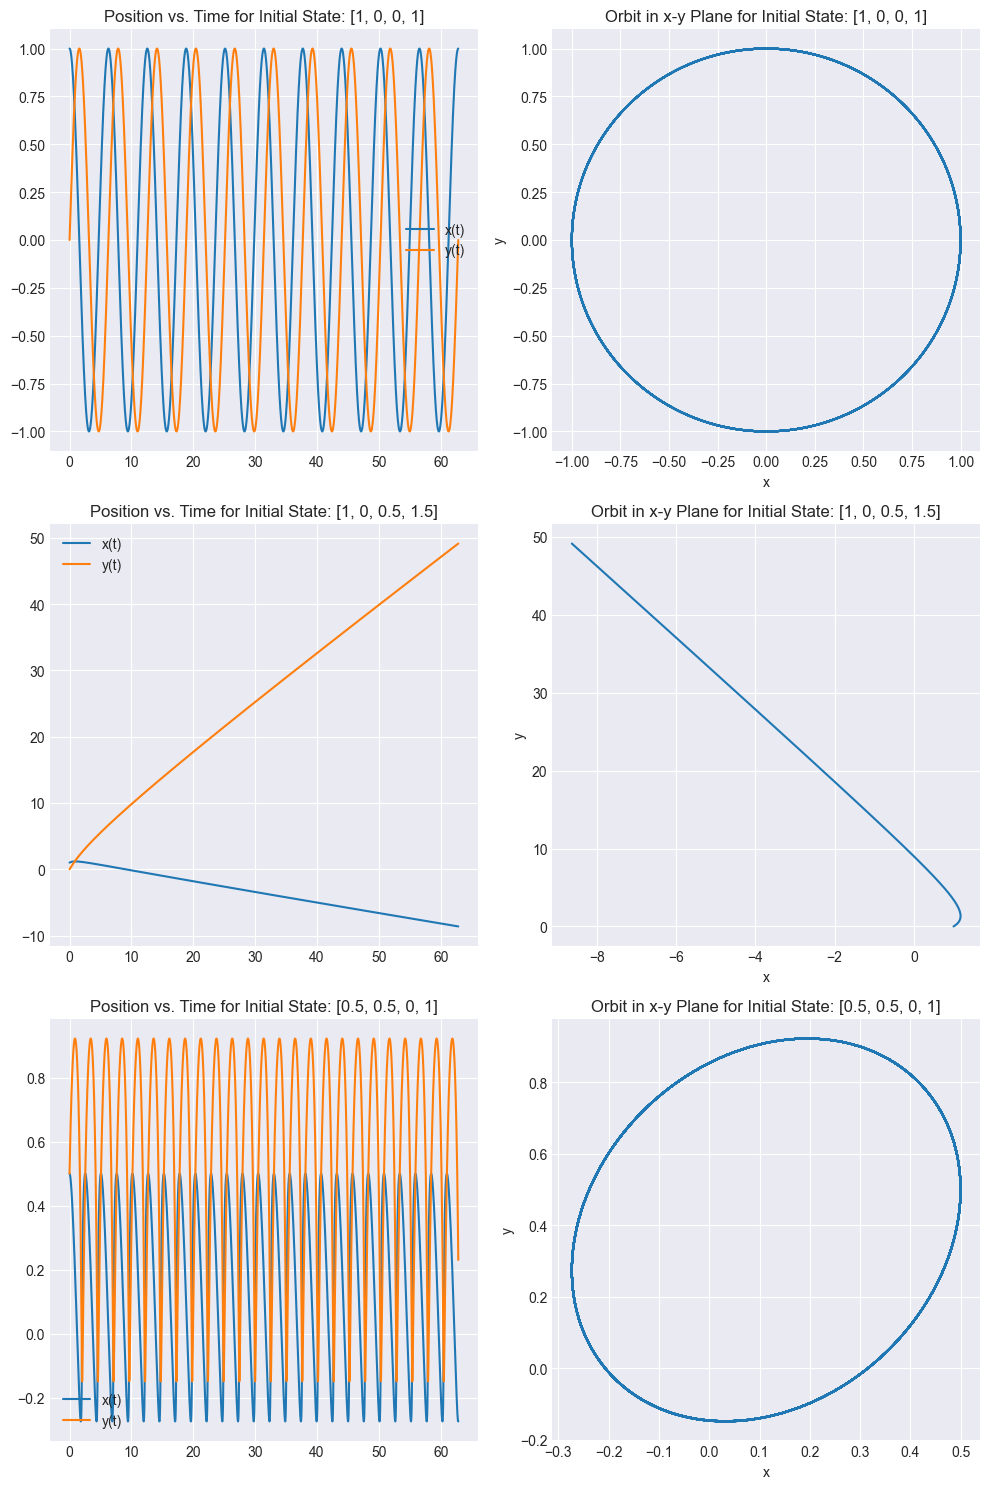

In [ ]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

def compute_derivatives(state, time=0):

    position_x, position_y, velocity_x, velocity_y = state
    distance_from_origin = np.sqrt(position_x**2 + position_y**2)
    
    dx_dt = velocity_x
    dy_dt = velocity_y
    dvx_dt = -position_x / distance_from_origin**3
    dvy_dt = -position_y / distance_from_origin**3
    
    return [dx_dt, dy_dt, dvx_dt, dvy_dt]

# Define the time intervals for simulation
time_intervals = np.linspace(0, 20*np.pi, 5000) 

# List of initial states for simulation
initial_states = [
    [1, 0, 0, 1],
    [1, 0, 0.5, 1.5],
    [0.5, 0.5, 0, 1]
]

plt.figure(figsize=(10, len(initial_states)*5))

for idx, initial_state in enumerate(initial_states, 1):
    # Solve the system of differential equations
    trajectory = odeint(compute_derivatives, initial_state, time_intervals)
    position_x_trajectory, position_y_trajectory = trajectory[:, 0], trajectory[:, 1]
    
    # Plot x and y positions against time
    plt.subplot(len(initial_states), 2, 2*idx-1)
    plt.plot(time_intervals, position_x_trajectory, label='x(t)')
    plt.plot(time_intervals, position_y_trajectory, label='y(t)')
    plt.legend()
    plt.title(f'Position vs. Time for Initial State: {initial_state}')
    
    # Plot the orbit in x-y plane
    plt.subplot(len(initial_states), 2, 2*idx)
    plt.plot(position_x_trajectory, position_y_trajectory)
    plt.title(f'Orbit in x-y Plane for Initial State: {initial_state}')
    plt.xlabel('x')
    plt.ylabel('y')

plt.tight_layout()
plt.show()


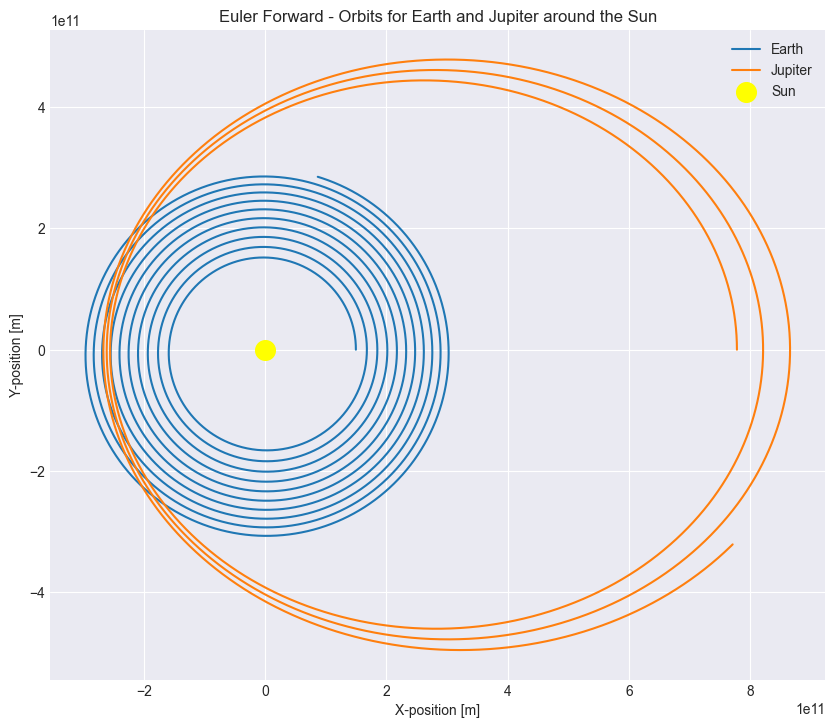

In [ ]:

import matplotlib.pyplot as plt

# Constants
GRAVITY_CONSTANT = 6.67430e-11
M_Sun = 1.989e30
AU = 1.496e11 
EARTH_ORBITAL_VELOCITY = 29783.0
JUPITER_ORBITAL_VELOCITY = 13069.0
YEAR_IN_SECONDS = 365.0 * 24.0 * 3600.0

def gravitational_acceleration(mass, x, y):
    distance_squared = x**2 + y**2
    distance_cubed = distance_squared**(1.5)
    acceleration_x = - (GRAVITY_CONSTANT * mass * x) / distance_cubed
    acceleration_y = - (GRAVITY_CONSTANT * mass * y) / distance_cubed
    return acceleration_x, acceleration_y

def euler_forward_orbit():
        
    # Time and time step
    current_time = 0
    end_time = 20 * YEAR_IN_SECONDS
    time_step = 50000
    
    # Initial conditions for Earth
    x_earth = AU
    y_earth = 0
    x_velocity_earth = 0
    y_velocity_earth = EARTH_ORBITAL_VELOCITY
    
    # Initial conditions for Jupiter (Elliptical orbit)
    x_jupiter = 5.2 * AU
    y_jupiter = 0
    x_velocity_jupiter = 0
    y_velocity_jupiter = JUPITER_ORBITAL_VELOCITY * 0.7  # Adjust the factor to make it more elliptical
    
    # Lists to store positions
    x_earth_values = [x_earth]
    y_earth_values = [y_earth]
    x_jupiter_values = [x_jupiter]
    y_jupiter_values = [y_jupiter]
    
    
    while current_time <= end_time:
        
        # Calculatingthe  acceleration => Just the Sun's gravitational force
        ax_earth, ay_earth = gravitational_acceleration(M_Sun, x_earth, y_earth)
        ax_jupiter, ay_jupiter = gravitational_acceleration(M_Sun, x_jupiter, y_jupiter)
        
        #Earth Euler
        x_earth += time_step * x_velocity_earth
        y_earth += time_step * y_velocity_earth
        x_velocity_earth += time_step * ax_earth
        y_velocity_earth += time_step * ay_earth
        
        #Jupiter Euler
        x_jupiter += time_step * x_velocity_jupiter
        y_jupiter += time_step * y_velocity_jupiter
        x_velocity_jupiter += time_step * ax_jupiter
        y_velocity_jupiter += time_step * ay_jupiter
        
        # Append everything...
        x_earth_values.append(x_earth)
        y_earth_values.append(y_earth)
        x_jupiter_values.append(x_jupiter)
        y_jupiter_values.append(y_jupiter)
        
        current_time += time_step
        
    return x_earth_values, y_earth_values, x_jupiter_values, y_jupiter_values

#Plot part
def plot_orbits():
    x_earth_values, y_earth_values, x_jupiter_values, y_jupiter_values = euler_forward_orbit()
    
    plt.figure(figsize=(10, 10))
    plt.plot(x_earth_values, y_earth_values, label="Earth")
    plt.plot(x_jupiter_values, y_jupiter_values, label="Jupiter")
    plt.scatter([0], [0], color='yellow', s=200, label="Sun")  # Position of the Sun
    plt.xlabel('X-position [m]')
    plt.ylabel('Y-position [m]')
    plt.gca().set_aspect('equal', adjustable='box')
    plt.legend()
    plt.grid(True)
    plt.title("Euler Forward - Orbits for Earth and Jupiter around the Sun")
    plt.show()

plot_orbits()


- Can you discover anything unusual?
- Hint: In our universe and in this course, energy is conserved.

#####  Energy is Not Conserved!

The total energy $ E $ of the system is given by the sum of the kinetic energy $ T $ and the potential energy $ U $:

$$ E = T + U $$

Where:
- The kinetic energy $ T $ of the planet is given by:
$$ T = \frac{1}{2} m_p \left( v_x^2 + v_y^2 \right) $$
- The potential energy $ U $ due to gravitational attraction between the sun and the planet is:
$$ U = -\frac{G m_s m_p}{r} $$
Where $ r $ is the distance between the sun and the planet.

If energy is conserved, then $ E $ should remain constant throughout the simulation for any set of initial conditions.

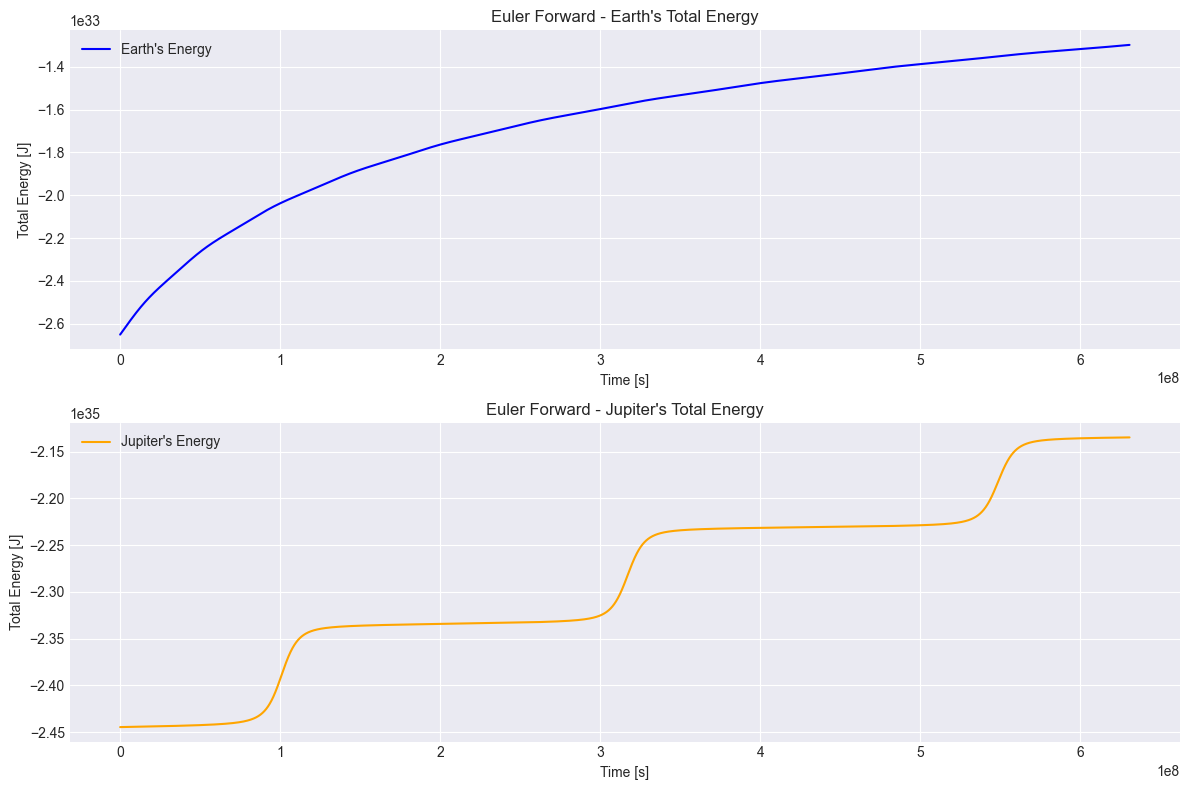

In [ ]:
import matplotlib.pyplot as plt

# Constants
GRAVITY_CONSTANT = 6.67430e-11
AU = 1.496e11 
EARTH_ORBITAL_VELOCITY = 29783.0
JUPITER_ORBITAL_VELOCITY = 13069.0
YEAR_IN_SECONDS = 365.0 * 24.0 * 3600.0

M_Sun = 1.989e30 # Mass of Sun
M_Earth = 5.972e24  # Mass of Earth
M_Jupiter = 1.898e27  # Mass of Jupiter

def gravitational_acceleration(mass, x, y):
    distance_squared = x**2 + y**2
    distance_cubed = distance_squared**(1.5)
    acceleration_x = - (GRAVITY_CONSTANT * mass * x) / distance_cubed
    acceleration_y = - (GRAVITY_CONSTANT * mass * y) / distance_cubed
    return acceleration_x, acceleration_y

def kinetic_energy(mass, vx, vy):
    return 0.5 * mass * (vx**2 + vy**2)

def potential_energy(mass1, mass2, x, y):
    r = (x**2 + y**2)**0.5
    return - GRAVITY_CONSTANT * mass1 * mass2 / r

def euler_forward_energy():
    current_time = 0
    end_time = 20 * YEAR_IN_SECONDS
    time_step = 50000

    x_earth = AU
    y_earth = 0
    x_velocity_earth = 0
    y_velocity_earth = EARTH_ORBITAL_VELOCITY

    x_jupiter = 5.2 * AU
    y_jupiter = 0
    x_velocity_jupiter = 0
    y_velocity_jupiter = JUPITER_ORBITAL_VELOCITY * 0.7

    energies_earth = []
    energies_jupiter = []
    times = []

    while current_time <= end_time:
        ax_earth, ay_earth = gravitational_acceleration(M_Sun, x_earth, y_earth)
        ax_jupiter, ay_jupiter = gravitational_acceleration(M_Sun, x_jupiter, y_jupiter)

        x_earth += time_step * x_velocity_earth
        y_earth += time_step * y_velocity_earth
        x_velocity_earth += time_step * ax_earth
        y_velocity_earth += time_step * ay_earth

        x_jupiter += time_step * x_velocity_jupiter
        y_jupiter += time_step * y_velocity_jupiter
        x_velocity_jupiter += time_step * ax_jupiter
        y_velocity_jupiter += time_step * ay_jupiter

        T_earth = kinetic_energy(M_Earth, x_velocity_earth, y_velocity_earth)
        U_earth = potential_energy(M_Earth, M_Sun, x_earth, y_earth)
        T_jupiter = kinetic_energy(M_Jupiter, x_velocity_jupiter, y_velocity_jupiter)
        U_jupiter = potential_energy(M_Jupiter, M_Sun, x_jupiter, y_jupiter)

        energies_earth.append(T_earth + U_earth)
        energies_jupiter.append(T_jupiter + U_jupiter)
        times.append(current_time)

        current_time += time_step

    return times, energies_earth, energies_jupiter

def plot_energies():
    times, energies_earth, energies_jupiter = euler_forward_energy()

    plt.figure(figsize=(12, 8))

    # Plot for Earth
    plt.subplot(2, 1, 1)
    plt.plot(times, energies_earth, label="Earth's Energy", color='blue')
    plt.xlabel('Time [s]')
    plt.ylabel('Total Energy [J]')
    plt.title("Euler Forward - Earth's Total Energy")
    plt.grid(True)
    plt.legend()

    # Plot for Jupiter
    plt.subplot(2, 1, 2) 
    plt.plot(times, energies_jupiter, label="Jupiter's Energy", color='orange')
    plt.xlabel('Time [s]')
    plt.ylabel('Total Energy [J]')
    plt.title("Euler Forward - Jupiter's Total Energy")
    plt.grid(True)
    plt.legend()

    plt.tight_layout()
    plt.show()

plot_energies()


***From the plot, we can see that the total energy is not perfectly constant over time => Energy is not being perfectly conserved in our numerical simulation!!!***

- This deviation could be due to the numerical method used => which might not perfectly conserve energy due to errors.

- In a real physical system, Energy would be conserved. 
- This is why it is important to choose an appropriate method for specific problems! 
- Especially when conservation laws are involved.

---


#####  Symplectic Euler
- Can you find ways to restore order in our simulation? 
    - You can ask for a hint.
    - Hint: Look into semi-implicit Euler or symplectic Euler methods.

---

***Quote from Sauer: "The issue of energy non-conservation in numerical simulations of mechanical systems is a well-known problem...***


- Some Numerical methods are designed to conserve certain properties of the system, such as energy. 
- The semi-implicit Euler method is such method that is often used for simulating Hamiltonian systems?
-  https://en.wikipedia.org/wiki/Hamiltonian_system

- ***The idea:***
    - Change the positions and speeds of things in a specific order.
    - Update positions and velocities in a staggered manner
    - This helps to keep the important structure of the system the same.
    - https://en.wikipedia.org/wiki/Symplectic_geometry

- ***Gameplan:***
    -  We update the velocity using the acceleration at the current position:
    $$ v_{n+1} = v_n + \Delta t \cdot a(x_n) $$
    - Update the position using the updated velocity:
    $$ x_{n+1} = x_n + \Delta t \cdot v_{n+1} $$

---

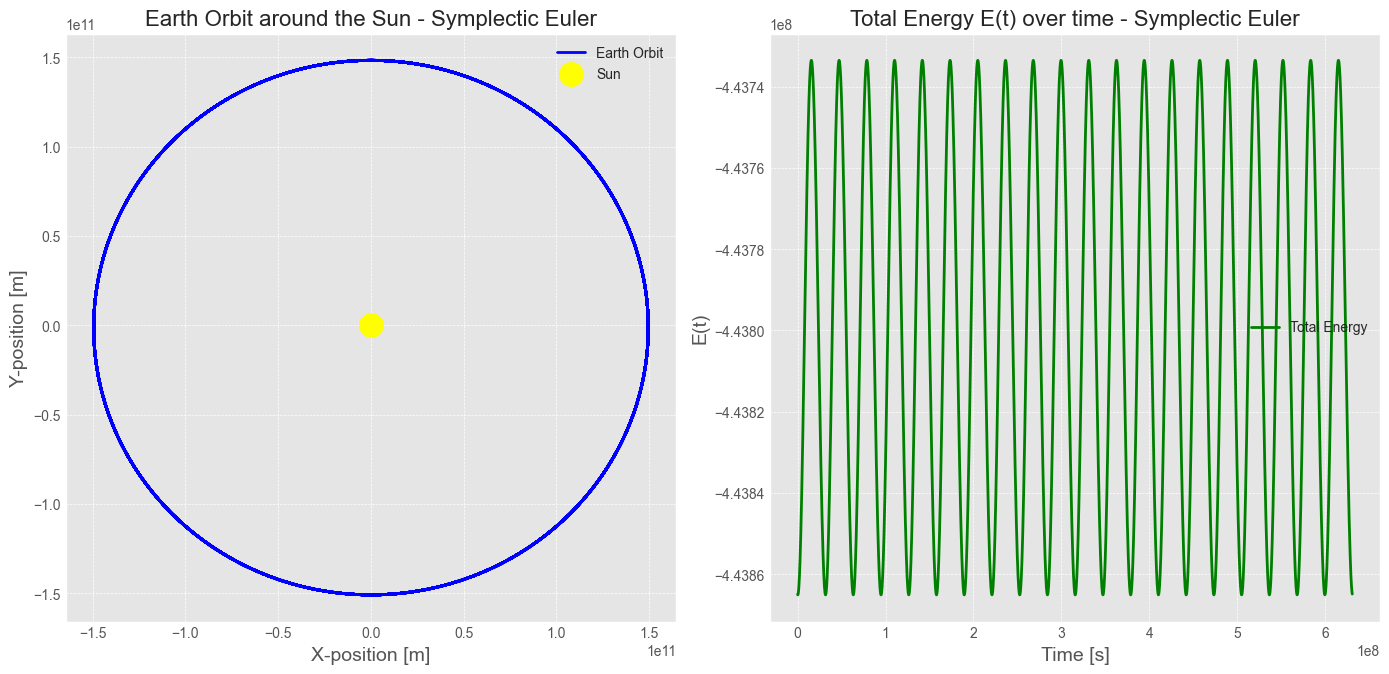

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
GRAVITY_CONSTANT = 6.67430e-11
M_Sun = 1.989e30
AU = 1.496e11 
YEAR_IN_SECONDS = 365.0 * 24.0 * 3600.0

# Gravitational acceleration due to the Sun
def gravitational_acceleration(x, y):
    distance = np.sqrt(x**2 + y**2)
    ax = -(GRAVITY_CONSTANT * M_Sun * x) / distance**3
    ay = -(GRAVITY_CONSTANT * M_Sun * y) / distance**3
    return ax, ay

# Symplectic Euler method for orbit calculations
def symplectic_euler(time_step, total_time):
    steps = int(total_time / time_step)
    x, y, vx, vy = np.zeros(steps), np.zeros(steps), np.zeros(steps), np.zeros(steps)
    x[0], y[0], vx[0], vy[0] = AU, 0, 0, EARTH_ORBITAL_VELOCITY
    
    for i in range(steps - 1):
        ax, ay = gravitational_acceleration(x[i], y[i])
        vx[i+1] = vx[i] + time_step * ax
        vy[i+1] = vy[i] + time_step * ay
        x[i+1] = x[i] + time_step * vx[i+1]
        y[i+1] = y[i] + time_step * vy[i+1]

    return x, y, vx, vy

# Time parameters
total_time = 20 * YEAR_IN_SECONDS
time_step = YEAR_IN_SECONDS / 365  # One day per step

# Simulate using symplectic Euler method
x, y, vx, vy = symplectic_euler(time_step, total_time)

# Compute total energy
E = 0.5 * (vx**2 + vy**2) - (GRAVITY_CONSTANT * M_Sun) / np.sqrt(x**2 + y**2)

# Plotting
# Set a better plot style
plt.style.use('ggplot')

# Plotting
plt.figure(figsize=(14, 7))

# Orbit plot
plt.subplot(1, 2, 1)
plt.plot(x, y, linewidth=2, color='blue', label='Earth Orbit')
plt.scatter(0, 0, color='yellow', s=300, label="Sun")  # Position of the Sun
plt.title('Earth Orbit around the Sun - Symplectic Euler', fontsize=16)
plt.xlabel('X-position [m]', fontsize=14)
plt.ylabel('Y-position [m]', fontsize=14)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.legend()

# Energy plot
plt.subplot(1, 2, 2)
time_values = np.arange(0, total_time, time_step)[:len(E)]
plt.plot(time_values, E, linewidth=2, color='green', label='Total Energy')
plt.title('Total Energy E(t) over time - Symplectic Euler', fontsize=16)
plt.xlabel('Time [s]', fontsize=14)
plt.ylabel('E(t)', fontsize=14)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.legend()

plt.tight_layout()
plt.show()


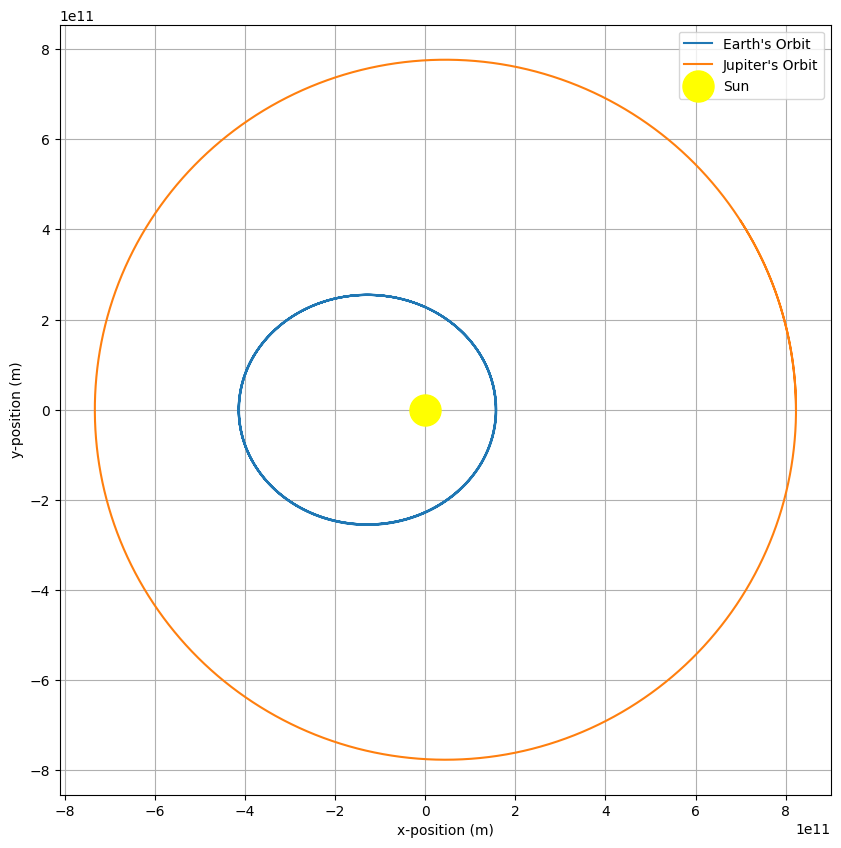

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

G = 6.67430e-11
M_sun = 1.989e30
AU = 1.496e11
epsilon = 1e6  # Softening parameter
m_jupiter = 1.898e27  # mass of Jupiter

def acceleration_jupiter(x, y):
    r = np.sqrt(x**2 + y**2)
    ax = -G * M_sun * x / (r**2 + epsilon**2)**(1.5)
    ay = -G * M_sun * y / (r**2 + epsilon**2)**(1.5)
    return ax, ay

def acceleration_earth(x, y, x_j, y_j):
    r = np.sqrt(x**2 + y**2)
    r_j = np.sqrt((x - x_j)**2 + (y - y_j)**2)
    ax = -G * M_sun * x / (r**2 + epsilon**2)**(1.5) + G * m_jupiter * (x - x_j) / (r_j**2 + epsilon**2)**(1.5)
    ay = -G * M_sun * y / (r**2 + epsilon**2)**(1.5) + G * m_jupiter * (y - y_j) / (r_j**2 + epsilon**2)**(1.5)
    return ax, ay

def symplectic_euler(dt, T, x0, y0, vx0, vy0, is_earth=False, x_jupiter=None, y_jupiter=None):
    N = int(T/dt)
    x = np.zeros(N)
    y = np.zeros(N)
    vx = np.zeros(N)
    vy = np.zeros(N)
    x[0], y[0], vx[0], vy[0] = x0, y0, vx0, vy0
    for i in range(N-1):
        if is_earth:
            ax, ay = acceleration_earth(x[i], y[i], x_jupiter[i], y_jupiter[i])
        else:
            ax, ay = acceleration_jupiter(x[i], y[i])
        
        vx[i+1] = vx[i] + dt * ax
        vy[i+1] = vy[i] + dt * ay
        x[i+1] = x[i] + dt * vx[i+1]
        y[i+1] = y[i] + dt * vy[i+1]
    return x, y, vx, vy

# Jupiter's initial conditions for an elliptical orbit
x0_jupiter = 5.5*AU
y0_jupiter = 0
vx0_jupiter = 0
vy0_jupiter = np.sqrt(G * M_sun * (2 / x0_jupiter - 1 / (5.2*AU)))

#Time parameters
T = 13*365.0*24.0*3600.0
year_in_sec = 365.0 * 24.0 * 3600.0
dt = year_in_sec / 10000

x_jupiter, y_jupiter, vx_jupiter, vy_jupiter = symplectic_euler(dt, T, x0_jupiter, y0_jupiter, vx0_jupiter, vy0_jupiter)

# Earth's initial conditions for an elliptical orbit
x0_earth = 1.05*AU
y0_earth = 0
vx0_earth = 0
vy0_earth = 35e3

x_earth, y_earth, vx_earth, vy_earth = symplectic_euler(dt, T, x0_earth, y0_earth, vx0_earth, vy0_earth, True, x_jupiter, y_jupiter)

plt.figure(figsize=(10, 10))
plt.plot(x_earth, y_earth, label="Earth's Orbit")
plt.plot(x_jupiter, y_jupiter, label="Jupiter's Orbit")
plt.scatter(0, 0, c='yellow', s=500, label='Sun', zorder=5)  # Sun at (0,0)
plt.xlabel('x-position (m)')
plt.ylabel('y-position (m)')
plt.gca().set_aspect('equal', adjustable='box')
plt.grid(True)
plt.legend()
plt.show()


### 8. Newton revisited - Something for nothing

- Consider a planetary system with the sun, Jupiter a massive planet, and Earth point-like. 
- Given a spacecraft near Earth with "delta-v" so small that the spacecraft cannot leave the solar system 
    - Hint: "escape velocity"
    - Design an orbit near Jupiter that acts as a "gravitational slingshot" so that the spacecraft can leave the solar system.

---

- Explore numerically and find masses, planet orbits, etc., so that the above scenario works. 
    - Hints: use astronomical units -> Earth is approximately 1 AU from the Sun. 
    - If you have trouble hitting Jupiter, use software to search for initial conditions. 
    - You can ask for hints.

---


**Escape Velocity**: 
- The spacecraft's velocity must larger then the escape velocity relative to the Sun at its current distance. 
$$ v_e = \sqrt{\frac{2GM_{\text{sun}}}{r}} $$

In [ ]:
def escape_velocity(M, r):
    return np.sqrt(2*G*M/r)

ve_earth = escape_velocity(M_sun, AU)
print(f"Escape velocity at Earth's distance: {ve_earth/1000:.2f} km/s")

Escape velocity at Earth's distance: 42.13 km/s


- For the spacecraft to leave the solar system after the gravitational assist, its speed after the encounter should exceed `ve_earth`.
- Lets choose some initial velocity that is close to the `ve_earth`!

In [ ]:
initial_velocity_satelit = 0.95 * ve_earth
print(f"Initial velocity of the satellite: {initial_velocity_satelit/1000:.2f} km/s")

Initial velocity of the satellite: 40.02 km/s


##### Code - First try for Sling [NOT COMPLETE] -> Cant find Initial conditions that work...

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def gravitational_force(x_position_earth, x_velocity_earth, y_position_earth, y_velocity_earth,
                        x_position_jupiter, x_velocity_jupiter, y_position_jupiter, y_velocity_jupiter,
                        x_position_satellite, x_velocity_satellite, y_position_satellite, y_velocity_satellite):
    return np.array([
        # Forces on Earth
        x_velocity_earth, -G * (mass_sun * x_position_earth / (x_position_earth**2 + y_position_earth**2)**(3/2) + mass_jupiter * (x_position_earth - x_position_jupiter) / ((x_position_earth - x_position_jupiter)**2 + (y_position_earth - y_position_jupiter)**2)**(3/2) + mass_satellite * (x_position_earth - x_position_satellite) / ((x_position_earth - x_position_satellite)**2 + (y_position_earth - y_position_satellite)**2)**(3/2)),
        y_velocity_earth, -G * (mass_sun * y_position_earth / (x_position_earth**2 + y_position_earth**2)**(3/2) + mass_jupiter * (y_position_earth - y_position_jupiter) / ((x_position_earth - x_position_jupiter)**2 + (y_position_earth - y_position_jupiter)**2)**(3/2) + mass_satellite * (y_position_earth - y_position_satellite) / ((x_position_earth - x_position_satellite)**2 + (y_position_earth - y_position_satellite)**2)**(3/2)),

        # Forces on Jupiter
        x_velocity_jupiter, -G * (mass_sun * x_position_jupiter / (x_position_jupiter**2 + y_position_jupiter**2)**(3/2) + mass_earth * (x_position_jupiter - x_position_earth) / ((x_position_jupiter - x_position_earth)**2 + (y_position_jupiter - y_position_earth)**2)**(3/2) + mass_satellite * (x_position_jupiter - x_position_satellite) / ((x_position_jupiter - x_position_satellite)**2 + (y_position_jupiter - y_position_satellite)**2)**(3/2)),
        y_velocity_jupiter, -G * (mass_sun * y_position_jupiter / (x_position_jupiter**2 + y_position_jupiter**2)**(3/2) + mass_earth * (y_position_jupiter - y_position_earth) / ((x_position_jupiter - x_position_earth)**2 + (y_position_jupiter - y_position_earth)**2)**(3/2) + mass_satellite * (y_position_jupiter - y_position_satellite) / ((x_position_jupiter - x_position_satellite)**2 + (y_position_jupiter - y_position_satellite)**2)**(3/2)),

        # Forces on Satellite
        x_velocity_satellite, -G * (mass_sun * x_position_satellite / (x_position_satellite**2 + y_position_satellite**2)**(3/2) + mass_earth * (x_position_satellite - x_position_earth) / ((x_position_satellite - x_position_earth)**2 + (y_position_satellite - y_position_earth)**2)**(3/2) + mass_jupiter * (x_position_satellite - x_position_jupiter) / ((x_position_satellite - x_position_jupiter)**2 + (y_position_satellite - y_position_jupiter)**2)**(3/2)),
        y_velocity_satellite, -G * (mass_sun * y_position_satellite / (x_position_satellite**2 + y_position_satellite**2)**(3/2) + mass_earth * (y_position_satellite - y_position_earth) / ((x_position_satellite - x_position_earth)**2 + (y_position_satellite - y_position_earth)**2)**(3/2) + mass_jupiter * (y_position_satellite - y_position_jupiter) / ((x_position_satellite - x_position_jupiter)**2 + (y_position_satellite - y_position_jupiter)**2)**(3/2))])


def runge_kutta_method(initial_state, h, cap):
    t = 0
    x1s, y1s, x2s, y2s, x3s, y3s, ts = [initial_state[0]], [initial_state[2]], [initial_state[4]], [initial_state[6]], [initial_state[8]], [initial_state[10]], [t]

    while t < cap:
        k1 = h * gravitational_force(*initial_state)
        k2 = h * gravitational_force(*(initial_state + k1 / 2))
        k3 = h * gravitational_force(*(initial_state + k2 / 2))
        k4 = h * gravitational_force(*(initial_state + k3))

        initial_state = initial_state + (k1 + 2 * k2 + 2 * k3 + k4) / 6
        t += h

        x1s.append(initial_state[0])
        y1s.append(initial_state[2])
        x2s.append(initial_state[4])
        y2s.append(initial_state[6])
        x3s.append(initial_state[8])
        y3s.append(initial_state[10])
        ts.append(t)

    return x1s, y1s, x2s, y2s, x3s, y3s, ts

#Space Contstants
G = 6.67428e-11 # gravitational constant in m^3 kg^-1 s^-2
AU = 1496e8 # 1 AU in meters

# Masses
mass_sun = 1.98892e30  # mass of the Sun in kg
mass_earth = 5.9742e24  # mass of Earth in kg
mass_jupiter = 1.89813e27  # mass of Jupiter in kg
mass_satellite = 1e3  # mass of a satellite in kg

# Initial conditions
# Earth
x_position_earth = -1*AU
x_velocity_earth = 0
y_position_earth = 0
y_velocity_earth = 29783

# Jupiter
x_position_jupiter = 0
x_velocity_jupiter = 17020
y_position_jupiter = 3*AU
y_velocity_jupiter = 0

# Satellite
x_position_satellite = -1.1*AU
x_velocity_satellite = 0
y_position_satellite = 0
y_velocity_satellite = 34500 

T = 3.1536e7 * 15  # 1 year in seconds multiplied by 15 (15 years)
dt = 1e3  # Time step (for example)

initial_conditions = np.array([x_position_earth, x_velocity_earth, y_position_earth, y_velocity_earth, x_position_jupiter, x_velocity_jupiter, y_position_jupiter, y_velocity_jupiter, x_position_satellite, x_velocity_satellite, y_position_satellite, y_velocity_satellite])

# Runge-Kutta
x1s, y1s, x2s, y2s, x3s, y3s, ts = runge_kutta_method(initial_conditions, dt, T)

# Plotting
plt.figure(figsize=(10, 10))
plt.plot(x1s, y1s, label="Earth's Orbit")
plt.plot(x2s, y2s, label="Jupiter's Orbit")
plt.plot(x3s, y3s, label="Satellite's Trajectory", linestyle='--', color='cyan')
plt.scatter(0, 0, c='yellow', s=500, label='Sun', zorder=5)  # Sun at (0,0)
plt.xlabel('x-position (m)')
plt.ylabel('y-position (m)')
plt.gca().set_aspect('equal', adjustable='box')
plt.grid(True)
plt.legend()
plt.show()

KeyboardInterrupt: 

##### Code - Second try for Sling [Correct] -> Managed to figure out initial conditions that work!

In [ ]:
#Space Contstants
G = 6.67428e-11 # gravitational constant in m^3 kg^-1 s^-2
AU = 1496e8 # 1 AU in meters

In [ ]:
# Gravitational force between two bodies in space
def gravitational_attraction(first_mass, second_mass):

    # First I compute the distance between the two bodies
    # We do it step by step to make the code more readable
    first_x, first_y = first_mass['position_x'], first_mass['position_y']
    second_x, second_y = second_mass['position_x'], second_mass['position_y']
    distance_x = (second_x-first_x)
    distance_y = (second_y-first_y)
    distance_total = math.sqrt(distance_x**2 + distance_y**2)

    # Then I compute the total force between the two bodies
    force_total = G * first_mass['mass'] * second_mass['mass'] / (distance_total**2)
    
    # Then I compute the force components in the x and y directions
    # I think this is what i missed before
    theta = math.atan2(distance_y, distance_x)
    force_x = math.cos(theta) * force_total
    force_y = math.sin(theta) * force_total
    return force_x, force_y

In [ ]:
#The machine learning part
def celestial_machine(celestial_bodies):
    timestep =864e3

    #Trajectories is a dictionary of lists of x and y positions for each body
    trajectories = {body['id']: {'x': [], 'y': []} for body in celestial_bodies}

    for _ in range(365):  # simulate for one year, you can increase this if needed
        force = {}
        for object in celestial_bodies:
            total_fx = total_fy = 0.0
            
            # I think this is the part that I missed before
            for other in celestial_bodies:
                
                # This helps us avoid self interaction
                if object is other:
                    continue
                
                # At each point in time, we compute the force between the two bodies for all pairs of bodies!
                else:
                    force_x, force_y = gravitational_attraction(object, other)
                    total_fx += force_x
                    total_fy += force_y
            
            # We store the total force on each body in a dictionary for a given time step
            force[object['id']] = (total_fx, total_fy)

        for object in celestial_bodies:
            force_x, force_y = force[object['id']]
            
            # This is just Newton's second law of motion
            object['velocity_x'] += force_x / object['mass'] * timestep
            object['velocity_y'] += force_y / object['mass'] * timestep

            # This is just finding the new position using the velocity we computed above
            object['position_x'] += object['velocity_x'] * timestep
            object['position_y'] += object['velocity_y'] * timestep

            # Now we store the positions in the dictionary
            trajectories[object['id']]['x'].append(object['position_x'])
            trajectories[object['id']]['y'].append(object['position_y'])

    # Trajectories is a dictionary of lists of x and y positions for each body
    return trajectories

- Before adding Earth => Simpler scenario where I only have satellite and Jupiter. 
- Approach Angle: The angle at which the satellite approaches the planet is crucial and I have no idea how to calculate it... 
- Small change in velocity can destroy the manuver => something close to the escape velociti or close to something with enormus mass...

33999.82290871171


C:\Users\villi\AppData\Local\Temp\ipykernel_14376\3345481856.py:65: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


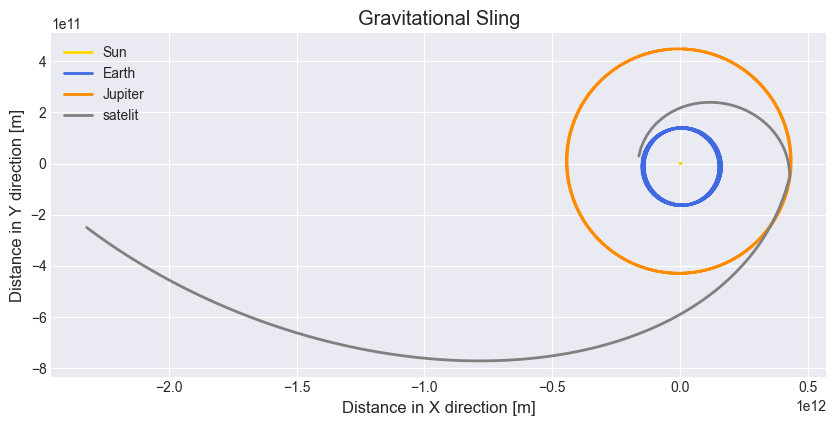

In [ ]:
import matplotlib.pyplot as plt

#Sun
M_Sun=1.98892e30 #Google
position_sun_x=0
position_sun_y=0
velocity_sun_x=0
velocity_sun_y=0

#Earth
M_Earth=5.9742e24 #Google
position_earth_x=-1*AU #Google
position_earth_y=0
velocity_earth_x=0
velocity_earth_y=29783 #Google

#Juiter
M_Jupiter=1.89813e27 #Google
position_jupiter_x=0
position_jupiter_y=3*AU #TO make it simple in realit Jupiter is 5.2*AU
velocity_jupiter_x=17020 # Guess
velocity_jupiter_y=0

#-------------------------------------------------------------------------------------------------------
#Satelit
M_Satelit=1e3 #Typically in the range of 2,000 kg to 6,000 kg. => 1e3
position_satelit_x=-1.1*AU #Arbitrary
position_satelit_y=0
velocity_satelit_x=0

# Just to demostrate how sesitive this is; 34000 works great but escape_velocity_satelit*0.80708=33999.82290871171 does not work that well...
#velocity_satelit_y=escape_velocity_satelit*0.80708  #34000
def escape_velocity(M, r):
    return np.sqrt(2*G*M/r)

escape_velocity_satelit = escape_velocity(M_Sun, AU)
print(escape_velocity_satelit*0.80708)

velocity_satelit_y=escape_velocity_satelit*0.80708 # If I change to 34000 it works better
#-------------------------------------------------------------------------------------------------------

Sun = {'id': 'Sun', 'mass': M_Sun, 'position_x': position_sun_x, 'position_y': position_sun_y, 'velocity_x': velocity_sun_x, 'velocity_y': velocity_sun_y}
Earth = {'id': 'Earth', 'mass': M_Earth, 'position_x': position_earth_x, 'position_y':  position_earth_y, 'velocity_x': velocity_earth_x, 'velocity_y': velocity_earth_y}
Jupiter = {'id': 'Jupiter', 'mass': M_Jupiter, 'position_x': position_jupiter_x, 'position_y': position_jupiter_y, 'velocity_x': velocity_jupiter_x, 'velocity_y': velocity_jupiter_y}
Satelit = {'id': 'satelit', 'mass': M_Satelit, 'position_x': position_satelit_x, 'position_y': position_satelit_y, 'velocity_x': velocity_satelit_x, 'velocity_y': velocity_satelit_y}

#-------------------------------------------------------------------------------------------------------

orbits = celestial_machine([Sun, Earth, Jupiter, Satelit])

#-------------------------------------------------------------------------------------------------------
# Plotting
# Define a color map for the bodies
color_map = {
    'Sun': 'gold',
    'Earth': 'royalblue',
    'Jupiter': 'darkorange',
    'satelit': 'gray'
}

# Increase the size of the figure
plt.figure(figsize=(10, 10))

# Use a different style
plt.style.use('seaborn-darkgrid')


for body, trajectory in orbits.items():
    plt.plot(trajectory['x'], trajectory['y'], label=body, color=color_map[body], linewidth=2)

plt.xlabel('Distance in X direction [m]')
plt.ylabel('Distance in Y direction [m]')
plt.gca().set_aspect('equal')
plt.legend()
plt.grid(True)
plt.title('Gravitational Sling')
plt.show()

There has to be a better way of doing this...